## Car Price Predictions with Multiple Linear Regression
### Step 1 : Data Collection

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/car_price_prediction_.csv")
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [ ]:
df.tail()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5
2499,2500,Toyota,2005,4.6,Diesel,Automatic,80978,Used,16594.14,RAV4


In [ ]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [ ]:
df.shape

(2500, 10)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool


<Axes: >

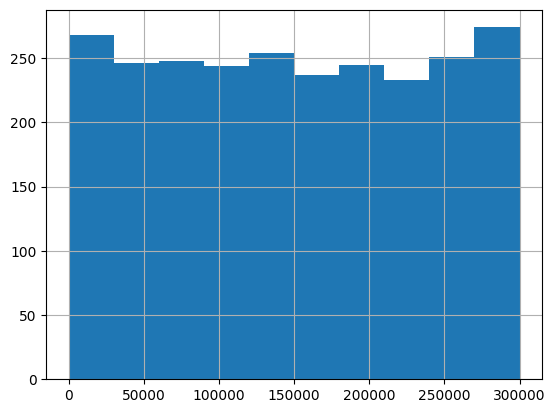

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram shows the weigntage of each value in the chosen column
df['Mileage'].hist(bins=10)

<Axes: xlabel='Fuel Type', ylabel='Price'>

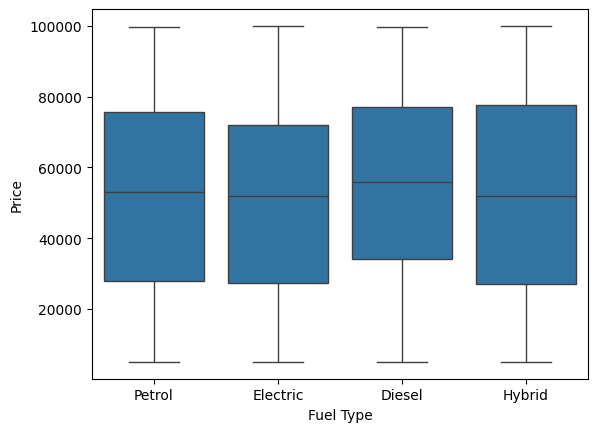

In [ ]:
# Boxplot : showa max, min and median
sns.boxplot(x='Fuel Type', y='Price', data=df)

<Axes: xlabel='Fuel Type', ylabel='Mileage'>

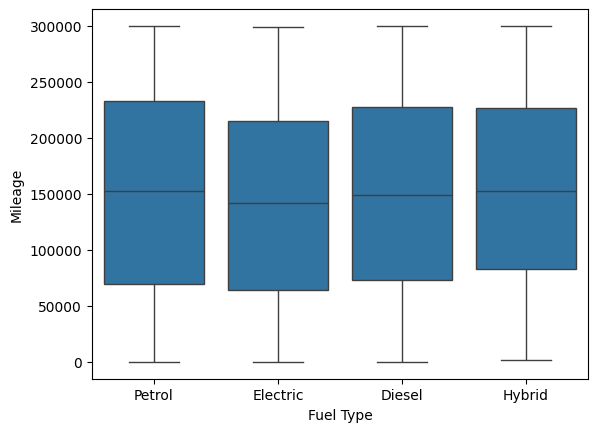

In [ ]:
# Boxplot : showa max, min and median
sns.boxplot(x='Fuel Type', y='Mileage', data=df)

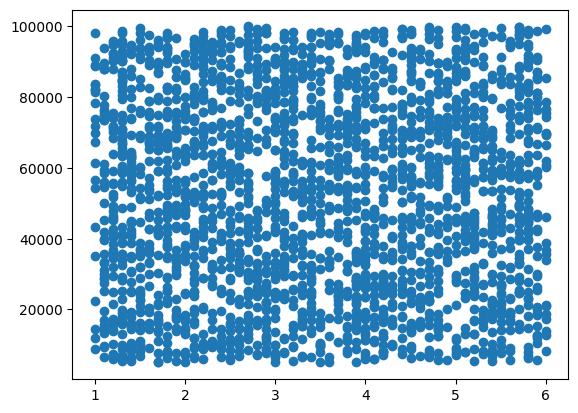

In [ ]:
#same graph using matplotlib
plt.scatter(df['Engine Size'],df['Price'])

In [ ]:
df_numerical_columns = df.drop(["Car ID", "Brand", "Year", "Fuel Type","Transmission", "Condition", "Model"], axis=1)
df_numerical_columns.head()

,Engine Size,Mileage,Price
0,2.3,114832,26613.92
1,4.4,143190,14679.61
2,4.5,181601,44402.61
3,4.1,68682,86374.33
4,2.6,223009,73577.10


<Axes: >

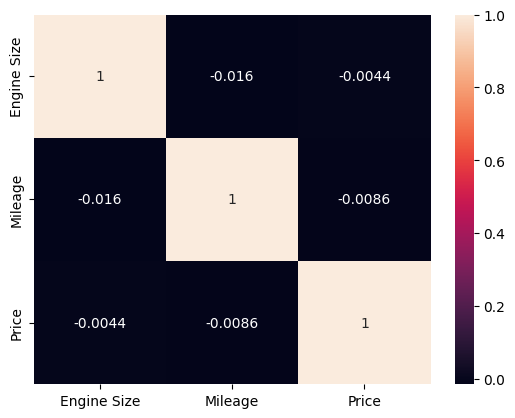

In [ ]:
corr = df_numerical_columns.corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='Transmission', ylabel='count'>

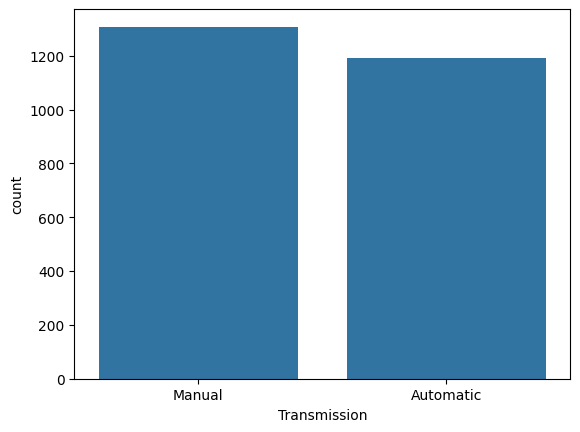

In [ ]:
df['Transmission'].value_counts()
sns.countplot(x='Transmission', data=df)

## Pre-Processing


In [ ]:
df = df_numerical_columns
df.head()

,Engine Size,Mileage,Price
0,2.3,114832,26613.92
1,4.4,143190,14679.61
2,4.5,181601,44402.61
3,4.1,68682,86374.33
4,2.6,223009,73577.10


In [ ]:
df_clean = df.dropna(axis=0) # delete rows with null values

In [ ]:
# delete columns with null values
df_clean = df.dropna(axis=1)

In [ ]:
#replace null values  with mean
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df['Engine Size'] = df['Engine Size'].fillna(df['Engine Size'].mean())

In [ ]:
# remove duplicate values
df = df.drop_duplicates()

### Data Processing

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Mileage", 'Engine Size']] = scaler.fit_transform(df[['Mileage', 'Engine Size']])

In [ ]:
from sklearn.model_selection import train_test_split

## Defining Input

In [ ]:
#seperating INPUT and OUTPUT COLUNS
X = df[["Mileage", 'Engine Size']]
y = df['Price']
#Spliting into test and train data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Model Selection And Training

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 1.0
MAE: 2.440323334032546e-16
MSE: 8.383688171720127e-32
RMSE: 2.8954599240397243e-16


In [ ]:
mileage = float(input("Enter Mileage: "))
engine_size = float(input("Enter Engine Size: "))
new_data = [[mileage, engine_size]]

predicted_price = lr.predict(new_data)
print("Predicted Price =", predicted_price[0])

Enter Mileage: 28000
Enter Engine Size: 3.5
Predicted Price = 28000.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
